## Reducción de componentes usando UMAP

Agregar descripción de umap C:

Fuentes

- https://umap-learn.readthedocs.io/en/latest/basic_usage.html#iris-data
- https://medium.com/@dan.allison/dimensionality-reduction-with-umap-b081837354dd
- https://stats.stackexchange.com/questions/402668/intuitive-explanation-of-how-umap-works-compared-to-t-sne
- https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
- https://www.biorxiv.org/content/10.1101/681726v1.full
- https://github.com/lmcinnes/umap


In [74]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import umap
from datetime import datetime
from sklearn import decomposition
from sklearn.ensemble import IsolationForest

### 3. Probando el algoritmo

#### 3.1 Creando el Dataset
Lo primero será tener un dataset de prueba, para ello se utilizarán los generadores de datos diponibles en [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#samples-generator). Para el primer test se considerarán 500.000 registros y 20 variables. Además se inyectarán 1.000 registros aleatorios con la finalidad de ingresar ruido al dataset

In [46]:
blobs, labels = make_blobs(n_samples=100000, n_features=20,centers=10,random_state=9)

nfeatures_original=pd.DataFrame(blobs)
l=pd.DataFrame(data=labels,columns=["label"])
l['label']=l['label'].apply(lambda x: "Label_"+str(x))
nfeatures_original=nfeatures_original.join(l)
nfeatures_original.describe()

features=[x for x in range(0,20)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-1.181031,1.236358,3.021616,-1.753823,-0.293033,-2.836509,1.916453,-0.688667,-1.344258,0.385845,0.276753,2.041937,1.376938,-2.373273,0.159167,0.480527,2.618076,1.433842,-0.094655,0.015022
std,5.659583,5.555835,4.825205,5.402805,7.372258,5.245176,4.689847,5.653846,5.640351,7.238277,3.696079,4.185402,5.574990,6.240970,5.163821,6.765554,4.103558,5.341437,5.054989,4.393253
min,-13.690929,-12.958122,-9.293236,-13.403483,-13.010677,-13.135723,-10.387713,-10.904233,-12.480454,-13.229306,-10.390519,-8.250953,-11.899272,-13.073727,-12.895709,-12.736603,-9.225948,-11.987973,-13.513120,-10.766431
25%,-5.087254,-0.746345,-0.923808,-5.990694,-7.150274,-7.146243,-1.753701,-5.827554,-6.365955,-7.553157,-3.094841,-1.842206,-2.288788,-7.430879,-4.590139,-6.710835,-0.075702,-0.944049,-3.064356,-3.065760
50%,-1.278008,2.372698,5.075274,-1.788691,-2.464808,-3.963756,2.695450,-1.543987,-1.377117,0.210152,1.536581,2.781277,1.565523,-4.883476,1.478991,2.885946,2.673771,2.353921,0.615650,-0.392938
75%,2.670725,5.873096,6.929528,0.649784,7.761363,0.178330,5.062965,4.074072,2.013441,7.867320,3.244540,5.681137,5.129169,3.704253,4.293812,6.855272,5.938848,5.308842,3.514852,4.032643
max,13.175298,11.265158,12.863002,13.495977,13.052402,9.719970,13.304797,12.013851,12.473946,13.377649,7.293850,11.693797,13.382393,13.107603,11.136702,11.714067,11.839732,11.961339,10.683543,10.193734


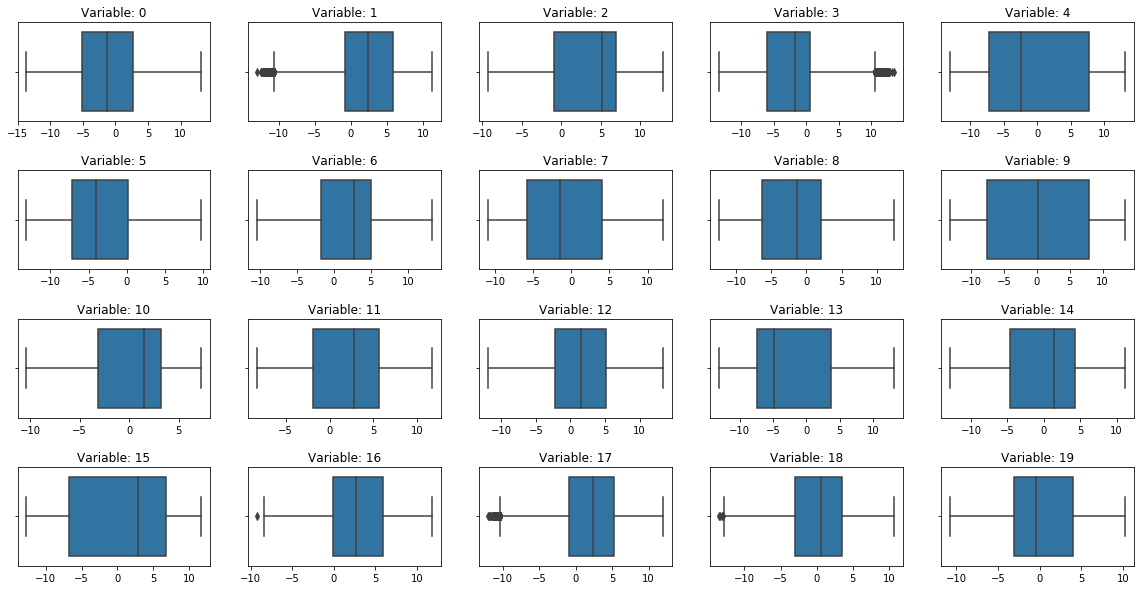

In [122]:
f=plt.figure(figsize=(20, 10))

gs = plt.GridSpec(4,5,f,hspace=0.5)

columna=0
for i in range(0,4):
    for j in range(0,5):
        plt.subplot(gs[i,j])
        ax=sns.boxplot(data=nfeatures_original,x=columna)   
        ax.set_xlabel('')
        plt.title("Variable: " + str(columna))
        columna=columna+1
        


1802


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


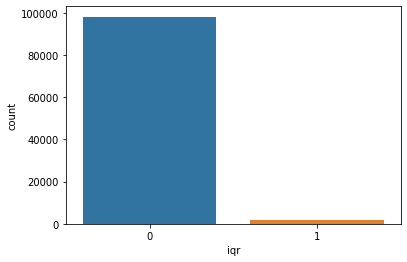

In [132]:
startTime = datetime.now()

q1 = nfeatures_original[features].quantile(0.25)
q3 = nfeatures_original[features].quantile(0.75)
iqr = q3 - q1

out=nfeatures_original[((nfeatures_original[features] < (q1 - 1.5 * iqr)) |(nfeatures_original[features]  > (q3 + 1.5 * iqr))).any(axis=1)]
out['iqr']="1"
no_out=nfeatures_original[~((nfeatures_original[features]  < (q1 - 1.5 * iqr)) |(nfeatures_original[features]  > (q3 + 1.5 * iqr))).any(axis=1)]
no_out['iqr']="0"

data_iqr=no_out.append(out)
endtime= datetime.now() 

sns.countplot(data=data_iqr,x='iqr')
print(len(out))


In [134]:
adicionales=[]
for i in range(0,1000):
    punto=[]
    for j in range(0,(len(nfeatures_original.columns)-1)):
        ran=( 1+random.uniform(0, 1))*random.randrange(round(nfeatures_original[j].min(),0), round(nfeatures_original[j].max(),0))+random.uniform(0, 1)
        punto.append(ran)
    
    adicionales.append(punto)
    
ad=pd.DataFrame(adicionales)
ad['label']='outlier'
nfeatures_real= nfeatures_original.append(ad) 

In [130]:
200/100000

0.002

In [51]:
nfeatures_real

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-8.643027,7.041426,6.090588,-1.627207,-10.897831,7.103238,3.482918,7.587153,1.959646,8.838421,...,-3.308840,4.568304,6.192669,5.921965,7.427677,3.756592,2.617058,7.023951,4.831644,Label_6
1,4.181552,-0.731207,-2.530154,10.366457,-6.210294,-6.404625,0.210180,1.463065,-4.852922,-7.722968,...,-2.580883,-7.121225,-0.002104,4.114780,-10.185528,-0.375536,-7.237196,6.413412,4.245820,Label_4
2,-3.162464,3.332378,6.802990,-1.131964,8.781156,4.755828,10.629880,-5.917642,0.530941,9.879430,...,6.997801,9.621586,-4.771636,-4.647746,5.389832,9.220918,5.796805,-4.830960,-2.528872,Label_1
3,-8.161864,7.981972,5.834522,-0.236317,-8.152371,5.335134,3.830777,9.013388,1.362907,11.329210,...,-2.276973,4.615751,3.699801,4.679671,7.328379,4.087280,3.808590,7.043919,3.025103,Label_6
4,-3.232300,5.828294,-5.883462,4.467184,-1.827022,-4.634791,-6.607346,7.893233,-9.280713,5.866160,...,-1.591911,2.816796,-3.931818,7.617427,-7.068638,1.869364,0.694443,2.183623,0.077377,Label_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-15.516610,-0.805440,9.466881,-9.203114,-1.399140,9.670238,0.216700,4.595425,20.448045,-14.715778,...,0.961016,9.559862,-9.489212,-13.864984,-3.718514,-5.985388,3.572055,-19.963155,8.417549,outlier
196,-13.186651,-6.094873,-12.360934,11.798110,15.112567,2.712188,12.057719,6.803902,5.001918,-14.197805,...,-3.184454,9.247836,-7.208214,11.294102,-25.137387,6.211876,7.883134,-1.643876,-3.643096,outlier
197,13.032421,-11.589836,-10.245227,-12.432082,-5.435129,5.984819,-2.567136,11.889803,-7.397684,7.775197,...,-0.947703,-2.701489,4.273355,-5.985118,-2.108938,-1.261428,-19.567315,2.664159,6.359310,outlier
198,-13.020938,4.698096,-7.205640,-0.702815,-12.238218,-6.540953,0.454152,0.125239,13.415068,4.600635,...,14.521493,14.210817,-3.176763,8.218453,-4.871221,-6.467163,-18.178781,12.199680,-18.395954,outlier


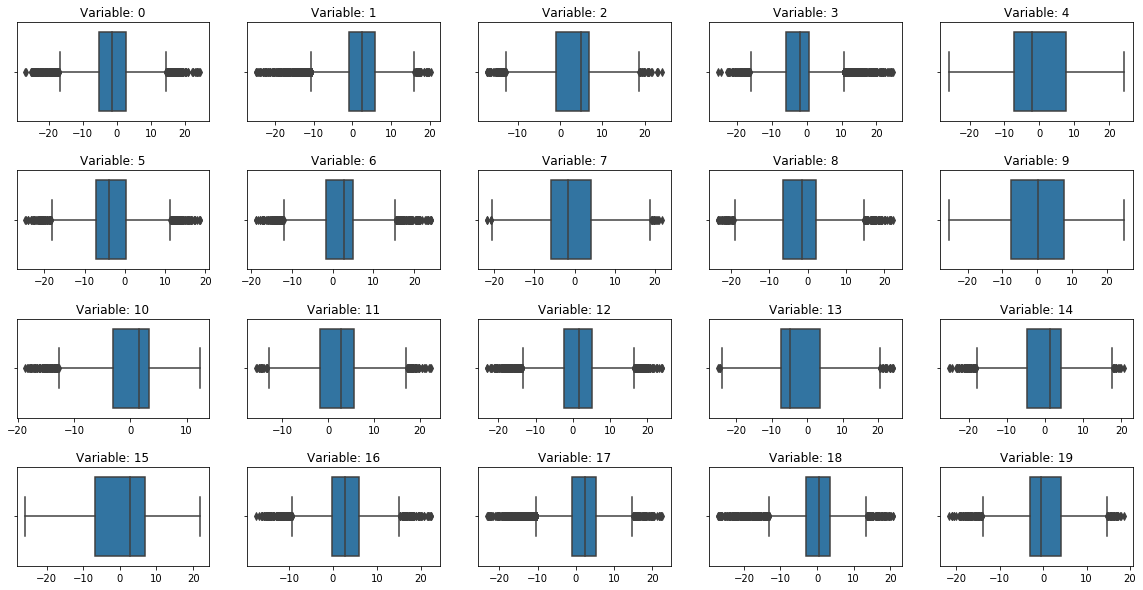

In [135]:
f=plt.figure(figsize=(20, 10))

gs = plt.GridSpec(4,5,f,hspace=0.5)

columna=0
for i in range(0,4):
    for j in range(0,5):
        plt.subplot(gs[i,j])
        ax=sns.boxplot(data=nfeatures_real,x=columna)   
        ax.set_xlabel('')
        plt.title("Variable: " + str(columna))
        columna=columna+1
        

2384
582


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


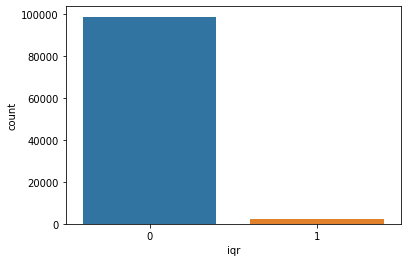

In [137]:
startTime = datetime.now()

q1 = nfeatures_real[features].quantile(0.25)
q3 = nfeatures_real[features].quantile(0.75)
iqr = q3 - q1

out=nfeatures_real[((nfeatures_real[features] < (q1 - 1.5 * iqr)) |(nfeatures_real[features]  > (q3 + 1.5 * iqr))).any(axis=1)]
out['iqr']="1"
no_out=nfeatures_real[~((nfeatures_real[features]  < (q1 - 1.5 * iqr)) |(nfeatures_real[features]  > (q3 + 1.5 * iqr))).any(axis=1)]
no_out['iqr']="0"

data_iqr=no_out.append(out)
endtime= datetime.now() 

sns.countplot(data=data_iqr,x='iqr')
print(len(out))
print((2384-1802))
#grafico_resultado(startTime,endtime,data_real,"iqr")

In [41]:
features=[x for x in range(0,20)]

In [138]:
reducer = umap.UMAP()

startTime = datetime.now()
embedding = reducer.fit_transform(nfeatures_real[features])
endtime= datetime.now() 

/usr/local/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


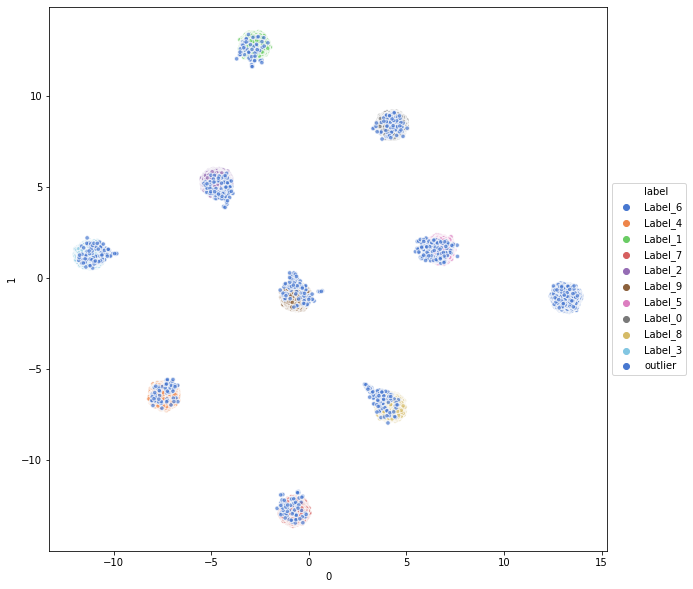

In [139]:
em=pd.DataFrame(embedding)
em=em.join(l)
em['label'].fillna("outlier",inplace=True)

plt.figure(figsize=(10, 10))
sns.scatterplot(data=em,x=0,y=1,hue='label',s=20,alpha = 0.7,linewidth=1,palette="muted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [155]:
pca = decomposition.PCA(n_components=2)
pca.fit(nfeatures_real[[x for x in range(0,20)]])
bla= pca.transform(nfeatures_real[[x for x in range(0,20)]])

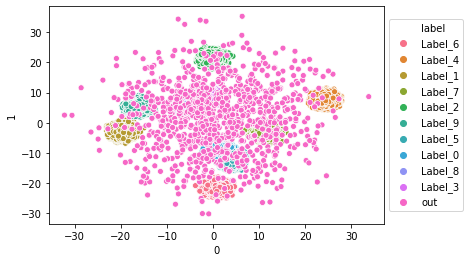

In [156]:
pca_a=pd.DataFrame(bla)
pca_a=pca_a.join(l)
pca_a['label'].fillna("out",inplace=True)
sns.scatterplot(data=pca_a,x=0,y=1,hue='label')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [146]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, n_jobs=-1, random_state=42, verbose=0)
clf.fit(em[[0,1]])
pred = clf.predict(em[[0,1]])
em['isolation']= pred


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


12120


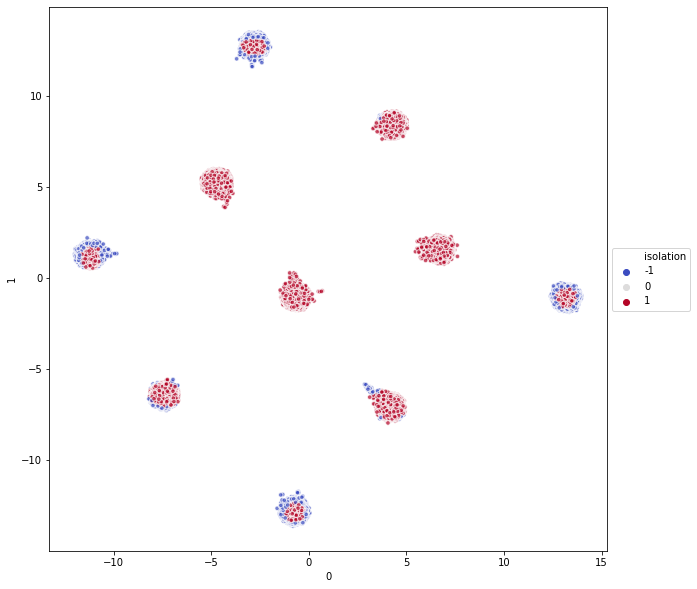

In [144]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=em,x=0,y=1,hue='isolation',s=20,alpha = 0.7,linewidth=1,palette="coolwarm")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(len(em[em['isolation']==-1]))

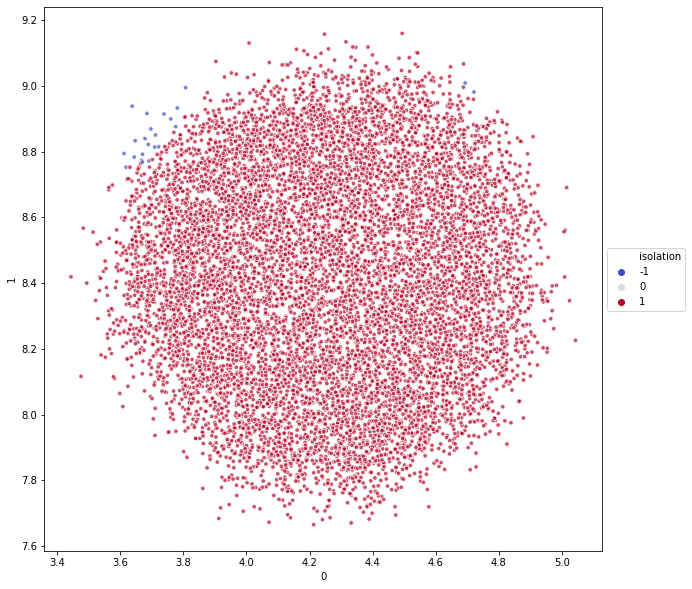

In [147]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=em[em['label']=='Label_0'],x=0,y=1,hue='isolation',s=20,alpha = 0.7,linewidth=1,palette="coolwarm")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [157]:
clf1=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, n_jobs=-1, random_state=42, verbose=0)
clf1.fit(pca_a[[0,1]])
pred = clf1.predict(pca_a[[0,1]])
pca_a['isolation']= pred


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


12120


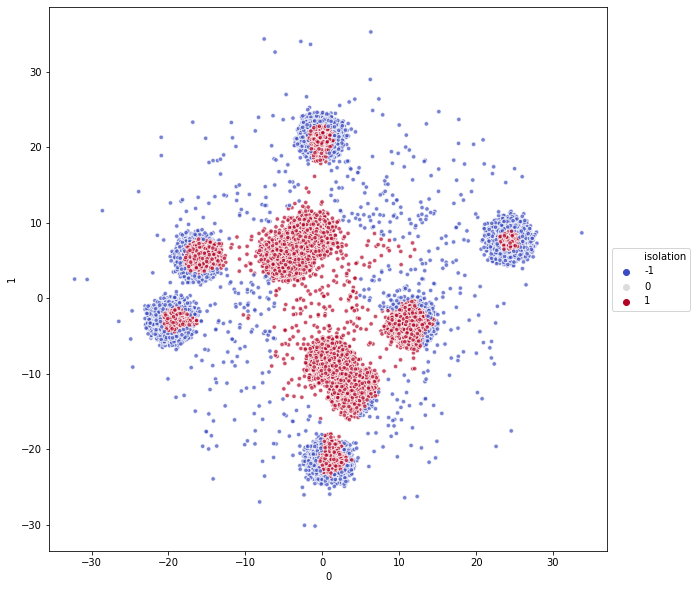

In [158]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_a,x=0,y=1,hue='isolation',s=20,alpha = 0.7,linewidth=1,palette="coolwarm")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(len(pca_a[pca_a['isolation']==-1]))

In [161]:
clf3=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, n_jobs=-1, random_state=42, verbose=0)
clf3.fit(nfeatures_real[features])
pred = clf3.predict(nfeatures_real[features])
nfeatures_real['isolation_puro']= pred


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Text(0.5, 0, 'Isolation en data con PCA')

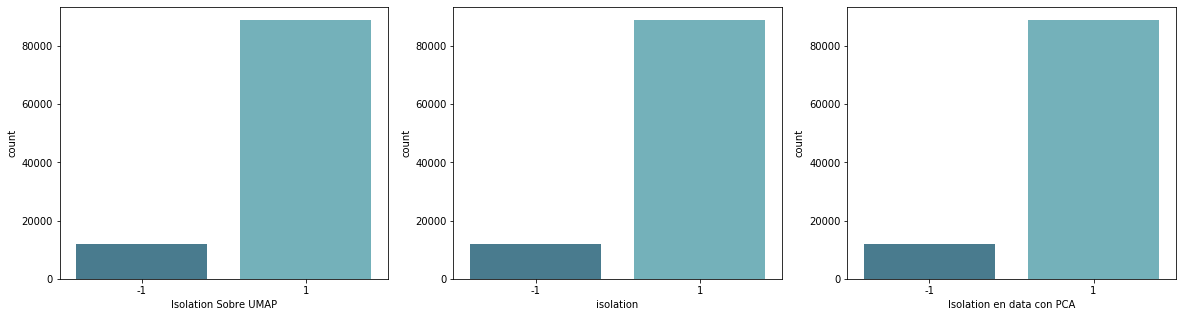

In [179]:
f=plt.figure(figsize=(20, 5))

gs = plt.GridSpec(1,3,f)

plt.subplot(gs[0,0])
ax=sns.countplot(data= nfeatures_real,x='isolation_puro',palette="GnBu_d")
ax.set_xlabel("Isolation en data real")
plt.subplot(gs[0,1])
ax1=sns.countplot(data= em,x='isolation',palette="GnBu_d")
ax.set_xlabel("Isolation Sobre UMAP")
plt.subplot(gs[0,2])
ax2=sns.countplot(data= pca_a,x='isolation',palette="GnBu_d")
ax2.set_xlabel("Isolation en data con PCA")


Text(0.5, 0, 'Isolation en data con PCA')

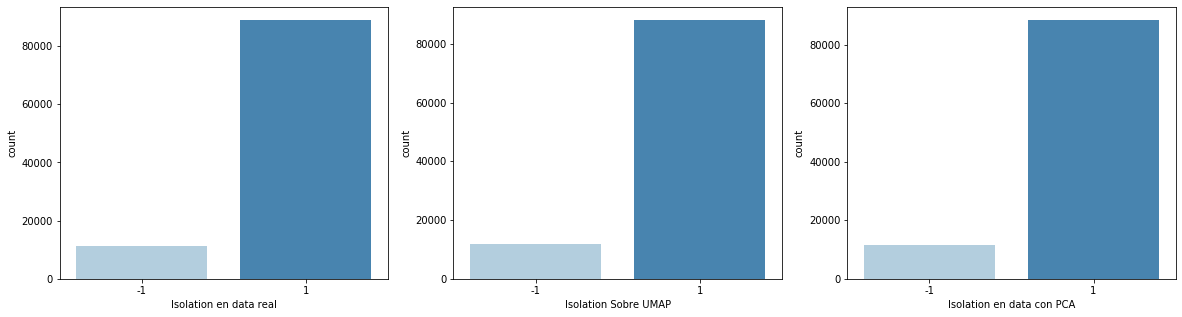

In [182]:
f=plt.figure(figsize=(20, 5))

gs = plt.GridSpec(1,3,f)

plt.subplot(gs[0,0])
ax=sns.countplot(data= nfeatures_real[~(nfeatures_real['label']=='outlier')],x='isolation_puro',palette="Blues")
ax.set_xlabel("Isolation en data real")
plt.subplot(gs[0,1])
ax=sns.countplot(data= em[~(em['label']=='outlier')],x='isolation',palette="Blues")
ax.set_xlabel("Isolation Sobre UMAP")
plt.subplot(gs[0,2])
ax2=sns.countplot(data= pca_a[~(pca_a['label']=='out')],x='isolation',palette="Blues")
ax2.set_xlabel("Isolation en data con PCA")

Text(0.5, 0, 'Isolation en data con PCA')

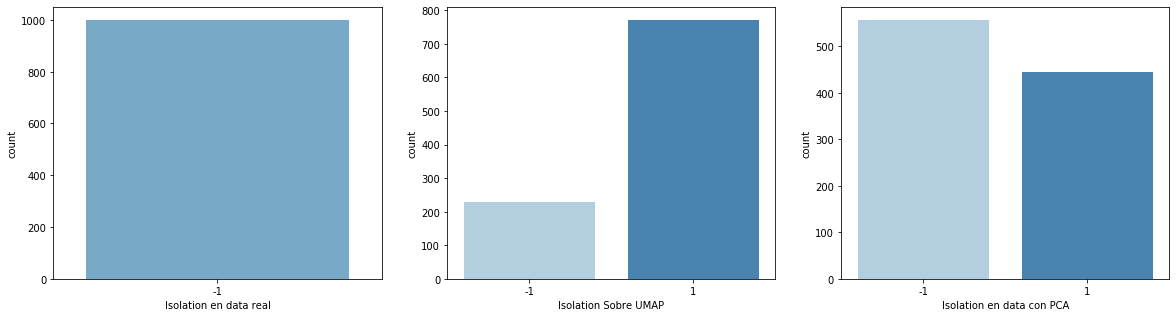

In [183]:
f=plt.figure(figsize=(20, 5))

gs = plt.GridSpec(1,3,f)

plt.subplot(gs[0,0])
ax=sns.countplot(data= nfeatures_real[nfeatures_real['label']=='outlier'],x='isolation_puro',palette="Blues")
ax.set_xlabel("Isolation en data real")
plt.subplot(gs[0,1])
ax=sns.countplot(data= em[em['label']=='outlier'],x='isolation',palette="Blues")
ax.set_xlabel("Isolation Sobre UMAP")
plt.subplot(gs[0,2])
ax2=sns.countplot(data= pca_a[pca_a['label']=='out'],x='isolation',palette="Blues")
ax2.set_xlabel("Isolation en data con PCA")